In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

#### **Calculating Alignment Score**

In [2]:
# Step 1: Generating English and Hindi hidden states randomly
# Note: In real life, the English hidden states will come from Encoder
# and Hindi hidden states from Decoder. As discussed in video.

query = tf.random.normal(shape=(1, 1, 5)) # Hindi
key   = tf.random.normal(shape=(1, 4, 5)) # English
value = tf.identity(key)

# In our case, both key and value our same and in most of the cases
# it will. So, we just take copy of key.

In [3]:
print('This is Encoder hidden states aka Values/Keys (English):\n')
print(key)

print('\n\nThis is Decoder hidden states aka Query (Hindi):\n')
print(query)

This is Encoder hidden states aka Values/Keys (English):

tf.Tensor(
[[[-0.1684307   1.514977    0.30911526  0.28211853 -0.5899976 ]
  [ 0.72271234  0.34328577  2.1250117   0.4584276  -0.03841743]
  [-0.40992028  1.2130448   1.1727004   0.49861977 -0.5706304 ]
  [ 0.73742425  0.78300256 -0.8456602   1.0013999  -2.2714462 ]]], shape=(1, 4, 5), dtype=float32)


This is Decoder hidden states aka Query (Hindi):

tf.Tensor([[[-1.3075145   0.0388818   0.46266425  0.5267501  -0.28575605]]], shape=(1, 1, 5), dtype=float32)


In [4]:
# Step 2: Pass it through a Dense layer

W_k = tf.keras.layers.Dense(8) # Encoder dense layer
W_q = tf.keras.layers.Dense(8) # Decoder dense layer

query = W_q(query)
key   = W_k(key)

In [5]:
print('This is Encoder hidden states (English) after Dense layer:\n')
print(key)

print('\n\nThis is Decoder hidden states (Hindi) after Dense layer:\n')
print(query)

This is Encoder hidden states (English) after Dense layer:

tf.Tensor(
[[[-0.24756703  0.5097544  -0.8054534   0.38278162  0.40553892
    0.7584797   0.9631532  -0.05434626]
  [ 0.74450785  0.39345014 -0.77214    -0.44951338  1.1595069
    1.0923375  -0.7526716   1.3522831 ]
  [ 0.06857663  0.63732237 -1.35146    -0.25373182  0.70769745
    0.71159935  0.51920086  0.78572273]
  [ 0.5321673   1.5415154  -0.8645557   0.08788854  0.7075511
    1.6135309   2.7103612   0.93703866]]], shape=(1, 4, 8), dtype=float32)


This is Decoder hidden states (Hindi) after Dense layer:

tf.Tensor(
[[[-0.29549062 -0.64636946 -0.5411916   0.39083678 -0.3006574
    0.7367449  -0.54453605  0.8530547 ]]], shape=(1, 1, 8), dtype=float32)


In [6]:
# Step 3: Sum the query and key
# You can't do it directly like 'query + key'
# We want the output in the shape 
# (batch_size, no. words hindi, no. words english, units)
# (1         , 1              , 4                , 8   )
# That's why, first we expand_dims at desired axis:

query = tf.expand_dims(query, axis=2)
key   = tf.expand_dims(key, axis=1)

query_plus_key = tf.nn.tanh(query + key)

In [7]:
print('After sum of query and key:\n')
print(query_plus_key)

After sum of query and key:

tf.Tensor(
[[[[-0.49529898 -0.13577142 -0.8732591   0.6490286   0.10449863
     0.90428156  0.3957648   0.66331416]
   [ 0.42109084 -0.24766086 -0.865116   -0.05860934  0.69566447
     0.9497362  -0.86100256  0.9759976 ]
   [-0.22309794 -0.00904684 -0.95560384  0.13625225  0.38595653
     0.89536494 -0.02532977  0.9273015 ]
   [ 0.23235427  0.71392614 -0.8865877   0.44522214  0.385832
     0.9819833   0.97404945  0.9457703 ]]]], shape=(1, 1, 4, 8), dtype=float32)


In [8]:
# Step 4: We don't need that last units axis now, that's why we will
# pass `query_plus_key` through a single neuron layer and get rid of that.

single_neuron = tf.keras.layers.Dense(1) # single neuron layer

score = single_neuron(query_plus_key)
print(score.shape)

# last shape is simply '1' we will squeeze that to get the final Score
score = tf.squeeze(score, -1)
print(score.shape)

(1, 1, 4, 1)
(1, 1, 4)


Always remember, the score should always be in this shape:

`(batch_size, query.shape[1], key.shape[1])`

Then only we can calculate attention weights that's why there are many shape transformations in Bahdanau Attention so the final score is in the desired shape.

In [9]:
print('Final Alignment Score:\n')
print(score)

Final Alignment Score:

tf.Tensor([[[-1.2186558 -0.8982853 -1.1886255 -2.804868 ]]], shape=(1, 1, 4), dtype=float32)


#### **Calculating Attention Weights**

In [10]:
attention_weights = tf.nn.softmax(score, -1)

print(attention_weights)

tf.Tensor([[[0.27679184 0.38131896 0.28523007 0.05665916]]], shape=(1, 1, 4), dtype=float32)


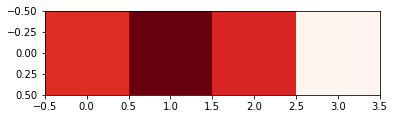

In [11]:
plt.imshow(tf.squeeze(attention_weights, 0), cmap='Reds')
plt.show()

#### **Calculating Context Vector**

In [12]:
context_vector = tf.matmul(attention_weights, value)

print(context_vector)

tf.Tensor([[[ 0.15382393  0.9405958   1.1824429   0.45185506 -0.46941498]]], shape=(1, 1, 5), dtype=float32)
